**Sentiment Analysis of Movie Reviews**

**Import necessary libraries**

In [ ]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from sklearn.svm import LinearSVC
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from google.colab import files
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Import the training dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Movie.csv")
print(df.shape)
df.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


**Removal of duplicate words**

In [ ]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.shape)

418
(49582, 2)


**Sentiment count**

In [ ]:
fig = go.Figure([go.Pie(labels=['Postive Sentiment', 'Negative Sentiment'],values=df['sentiment'].value_counts().values)])
fig.update_layout(title_text="Pie chart of Target Variable", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(hole=.4,)
fig.show()
print("\nThis indicate the dataset is balanced well")


This indicate the dataset is balanced well


Let's take one review as sample and understand why we need to clean the text

In [ ]:
review = df['review'].loc[1]
review

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

Normally any NLP task involves following text cleaning techniques :

1-Removal of HTML contents like "< br>".

2-Removal of punctutions, special characters like '\'.

3-Removal of stopwords like is, the which do not offer much insight.

4-Stemming/Lemmatization to bring back multiple forms of same word to their common root like 'coming', 'comes' into 'come'.

5-Vectorization - Encode the numeric values once you have cleaned it.


**Removing html strips**

In [ ]:
soup = BeautifulSoup(review, "html.parser")
review = soup.get_text()
review

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

We can see HTML tags are removed; so in the next step we will remove everything except lower/upper case letters using Regular Expressions.

**Removing special character and noise**

In [ ]:
review = re.sub('[^a-zA-Z0-9]', ' ', review)
review

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

**Lowercase the review**

Next we will bring everything into lowercase

In [ ]:
review = review.lower()
review

'a wonderful little production  the filming technique is very unassuming  very old time bbc fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  the actors are extremely well chosen  michael sheen not only  has got all the polari  but he has all the voices down pat too  you can truly see the seamless editing guided by the references to williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  a masterful production about one of the great master s of comedy and his life  the realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  it plays on our knowledge and our senses  particularly with the scenes concerning orton and halliwell and the sets  particularly of their flat with halliwell s murals decorating every surface  are terribly well done '

**Stopword removal**

Stopwords removal - since stopwords removal works on every word in your text we need to split the text.

In [ ]:
review = list(map(str,review.split()))

In [ ]:
for i in range(10):
  print(review[i])

a
wonderful
little
production
the
filming
technique
is
very
unassuming


In [ ]:
review = [word for word in review if not word in set(stopwords.words('english'))]
for i in range(10):
  print(review[i])

wonderful
little
production
filming
technique
unassuming
old
time
bbc
fashion


**Stemming/Lemmatization - we will apply both and see the difference**

In [ ]:
ps = PorterStemmer()
review_s = [ps.stem(word) for word in review]
review_s

['wonder',
 'littl',
 'product',
 'film',
 'techniqu',
 'unassum',
 'old',
 'time',
 'bbc',
 'fashion',
 'give',
 'comfort',
 'sometim',
 'discomfort',
 'sens',
 'realism',
 'entir',
 'piec',
 'actor',
 'extrem',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voic',
 'pat',
 'truli',
 'see',
 'seamless',
 'edit',
 'guid',
 'refer',
 'william',
 'diari',
 'entri',
 'well',
 'worth',
 'watch',
 'terrificli',
 'written',
 'perform',
 'piec',
 'master',
 'product',
 'one',
 'great',
 'master',
 'comedi',
 'life',
 'realism',
 'realli',
 'come',
 'home',
 'littl',
 'thing',
 'fantasi',
 'guard',
 'rather',
 'use',
 'tradit',
 'dream',
 'techniqu',
 'remain',
 'solid',
 'disappear',
 'play',
 'knowledg',
 'sens',
 'particularli',
 'scene',
 'concern',
 'orton',
 'halliwel',
 'set',
 'particularli',
 'flat',
 'halliwel',
 'mural',
 'decor',
 'everi',
 'surfac',
 'terribl',
 'well',
 'done']

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
lem = WordNetLemmatizer()
review = [lem.lemmatize(word) for word in review]
review

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion',
 'give',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actor',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voice',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'reference',
 'williams',
 'diary',
 'entry',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'come',
 'home',
 'little',
 'thing',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'technique',
 'remains',
 'solid',
 'disappears',
 'play',
 'knowledge',
 'sens',
 'particularly',
 'scene',
 'concerning',
 'orton',
 'halliwell',
 'set',
 'particularly',
 'flat',
 'halliwell',
 'mural',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

We can see that 'little' has become 'littl' after Stemming but remained 'little' after Lemmatization. We will use Lemmatization.

**Merge the text**

In [ ]:
review = ' '.join(review)
review

'wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done'

**Creating the corpes**

Our next step will be to bring this text in mathematical forms and to do so we will create a Corpus first

In [ ]:
corpus = []
corpus.append(review)

**Vectorization of text**

**Count Vectorizer**

In [ ]:
count_vec = CountVectorizer()
review_count_vec = count_vec.fit_transform(corpus)

review_count_vec.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
        1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1]])

So we can see the data has become numeric with 1,2 and 3s based on the number of times they appear in the text.

**TF-IDF**

In [ ]:
tfidf_vec = TfidfVectorizer()
review_tfidf_vec = tfidf_vec.fit_transform(corpus)

review_tfidf_vec.toarray()

array([[0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.19425717, 0.09712859, 0.09712859,
        0.09712859, 0.19425717, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.19425717,
        0.09712859, 0.09712859, 0.19425717, 0.09712859, 0.09712859,
        0.19425717, 0.09712859, 0.19425717, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.19425717, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.29138576, 0.09

**Training test splitting**

In [ ]:
dataset_train, dataset_test, train_data_label, test_data_label = train_test_split(df['review'], df['sentiment'], test_size=0.25, random_state=42)

Convert sentiments to numeric forms

In [ ]:
train_data_label = (train_data_label.replace({'positive': 1, 'negative': 0})).values
test_data_label  = (test_data_label.replace({'positive': 1, 'negative': 0})).values

Clean the text and build the train and test corpus

In [ ]:
corpus_train = []
corpus_test  = []

for i in range(dataset_train.shape[0]):
    soup = BeautifulSoup(dataset_train.iloc[i], "html.parser")
    review = soup.get_text()
    review = re.sub('[^a-zA-Z0-9]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    lem = WordNetLemmatizer()
    review = [lem.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus_train.append(review)
    
for j in range(dataset_test.shape[0]):
    soup = BeautifulSoup(dataset_test.iloc[j], "html.parser")
    review = soup.get_text()
    review = re.sub('[^a-zA-Z0-9]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    lem = WordNetLemmatizer()
    review = [lem.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus_test.append(review)

Let's validate one sample entry

In [ ]:
corpus_train[0]

'eko centric episode explores aftermath tragic event rocked castaway previous one main character john locke sawyer kate hurley come term incident hatch locke eko set find henry took turn eko mission trying figure symbol locke drawn sketch see flash eko life sydney priest come contact brother stranger also witness tragedy struck hatch boil room temperature michael continues remain mystery excellent lost episode many interesting turn'

In [ ]:
corpus_test[0]

'soul plane horrible attempt comedy appeal people thick skull bloodshot eye furry pawn plot incoherent also non existent acting mostly sub sub par gang highly moronic dreadful character thrown bad measure joke often spotted mile ahead almost never even bit amusing movie lack structure full racial stereotype must seemed old even fifty thing really going pretty lady really want rent something adult section ok hardly see anything recommend since probably lot better productive time chasing rat sledgehammer inventing waterproof teabags whatever 2 10'

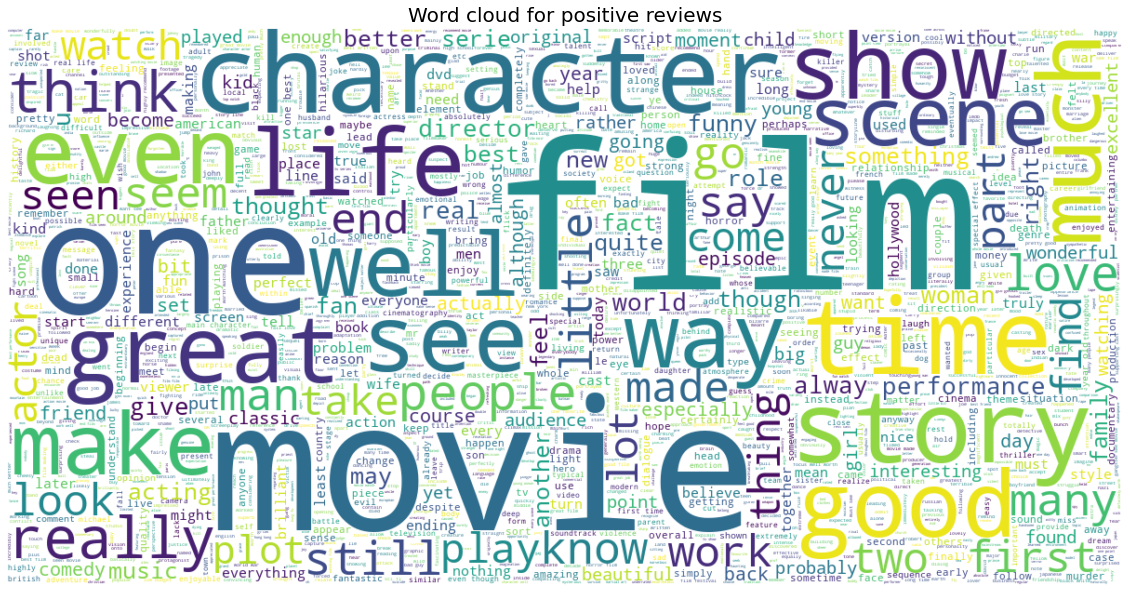

In [ ]:
positive_data_string=""
for i in range(10000):
    if(train_data_label[i]==1):
      positive_data = corpus_train[i]
      positive_data_string+=positive_data
      
    
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

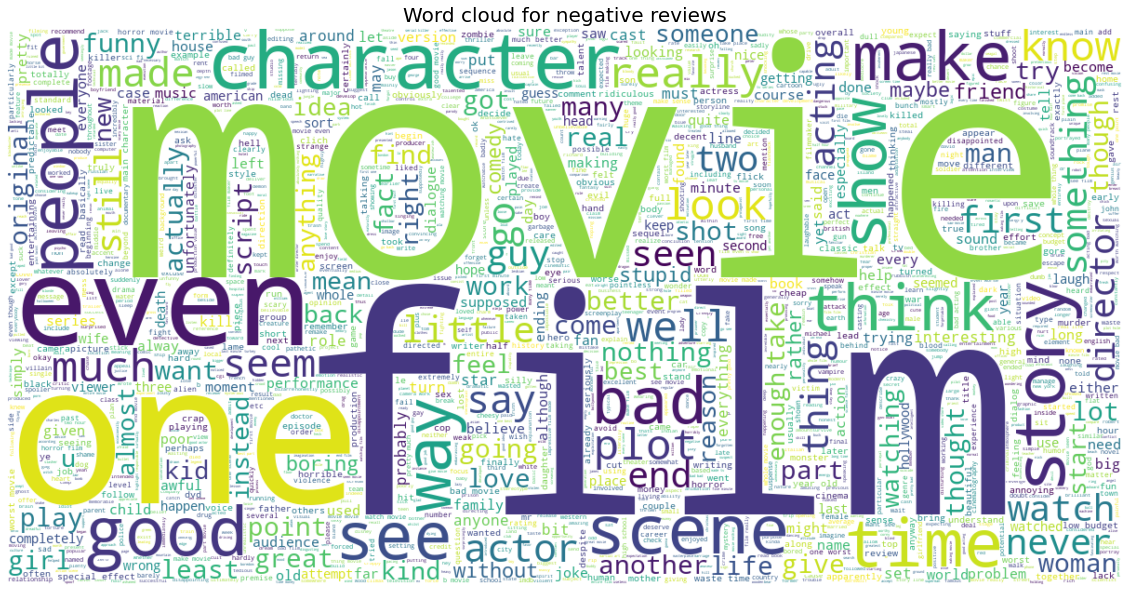

In [ ]:
positive_data_string=""
for i in range(10000):
    if(train_data_label[i]==0):
      positive_data = corpus_train[i]
      positive_data_string+=positive_data
      
    
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

We will now vectorize using TF-IDF technique.

In [ ]:
tfidf_vec = TfidfVectorizer()
tfidf_vec_train = tfidf_vec.fit_transform(corpus_train)
tfidf_vec_test = tfidf_vec.transform(corpus_test)

We will vectorize using count vectorizer

In [ ]:
count_vec = CountVectorizer()
count_vec_train = count_vec.fit_transform(corpus_train)
count_vec_test = count_vec.transform(corpus_test)

**Models**

**SVM**

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(tfidf_vec_train, train_data_label)
predict = linear_svc.predict(tfidf_vec_test)

In [ ]:
print("Classification Report: \n", classification_report(test_data_label, predict,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict))
print("Accuracy: \n", accuracy_score(test_data_label, predict))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.88      0.90      6168
    Positive       0.89      0.92      0.90      6228

    accuracy                           0.90     12396
   macro avg       0.90      0.90      0.90     12396
weighted avg       0.90      0.90      0.90     12396

Confusion Matrix: 
 [[5435  733]
 [ 517 5711]]
Accuracy: 
 0.8991610196837689


In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(count_vec_train, train_data_label)
predict = linear_svc.predict(count_vec_test)

In [ ]:
print("Classification Report: \n", classification_report(test_data_label, predict,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict))
print("Accuracy: \n", accuracy_score(test_data_label, predict))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.90      0.88      0.89      6168
    Positive       0.88      0.90      0.89      6228

    accuracy                           0.89     12396
   macro avg       0.89      0.89      0.89     12396
weighted avg       0.89      0.89      0.89     12396

Confusion Matrix: 
 [[5435  733]
 [ 593 5635]]
Accuracy: 
 0.8930300096805421


So we are getting maximum accuracy using TF-IDF vectorizer

**Multinomial NB**

In [ ]:
mnb=MultinomialNB()
mnb.fit(tfidf_vec_train, train_data_label)
predict = mnb.predict(tfidf_vec_test)

In [ ]:
print("Classification Report: \n", classification_report(test_data_label, predict,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict))
print("Accuracy: \n", accuracy_score(test_data_label, predict))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.89      0.87      0.88      6168
    Positive       0.88      0.90      0.89      6228

    accuracy                           0.88     12396
   macro avg       0.89      0.88      0.88     12396
weighted avg       0.89      0.88      0.88     12396

Confusion Matrix: 
 [[5380  788]
 [ 639 5589]]
Accuracy: 
 0.8848822200709906


In [ ]:
mnb=MultinomialNB()
mnb.fit(count_vec_train, train_data_label)
predict = mnb.predict(count_vec_test)

In [ ]:
print("Classification Report: \n", classification_report(test_data_label, predict,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict))
print("Accuracy: \n", accuracy_score(test_data_label, predict))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.88      0.88      0.88      6168
    Positive       0.88      0.89      0.88      6228

    accuracy                           0.88     12396
   macro avg       0.88      0.88      0.88     12396
weighted avg       0.88      0.88      0.88     12396

Confusion Matrix: 
 [[5434  734]
 [ 714 5514]]
Accuracy: 
 0.883188125201678


**Logistic regression**

In [ ]:
lr=LogisticRegression()
lr.fit(tfidf_vec_train, train_data_label)
predict = lr.predict(tfidf_vec_test)

In [ ]:
print("Classification Report: \n", classification_report(test_data_label, predict,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict))
print("Accuracy: \n", accuracy_score(test_data_label, predict))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.89      0.87      0.88      6168
    Positive       0.87      0.89      0.88      6228

    accuracy                           0.88     12396
   macro avg       0.88      0.88      0.88     12396
weighted avg       0.88      0.88      0.88     12396

Confusion Matrix: 
 [[5343  825]
 [ 654 5574]]
Accuracy: 
 0.8806873184898354


In [ ]:
lr=LogisticRegression()
lr.fit(count_vec_train, train_data_label)
predict = lr.predict(count_vec_test)

In [ ]:
print("Classification Report: \n", classification_report(test_data_label, predict,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict))
print("Accuracy: \n", accuracy_score(test_data_label, predict))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.90      0.88      0.89      6168
    Positive       0.89      0.91      0.90      6228

    accuracy                           0.89     12396
   macro avg       0.89      0.89      0.89     12396
weighted avg       0.89      0.89      0.89     12396

Confusion Matrix: 
 [[5435  733]
 [ 574 5654]]
Accuracy: 
 0.8945627621813488


**HyperParameter tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV



In [ ]:
param_grid = {'C': [0.01,0.1, 1, 10, 100], 
              'penalty':['l1','l2']} 
  
grid = GridSearchCV(LinearSVC(), param_grid)
grid.fit(tfidf_vec_train, train_data_label)

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [ ]:
predict=grid.predict(tfidf_vec_test)

In [ ]:
print("Classification Report: \n", classification_report(test_data_label, predict,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict))
print("Accuracy: \n", accuracy_score(test_data_label, predict))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.92      0.89      0.90      6168
    Positive       0.89      0.92      0.90      6228

    accuracy                           0.90     12396
   macro avg       0.90      0.90      0.90     12396
weighted avg       0.90      0.90      0.90     12396

Confusion Matrix: 
 [[5462  706]
 [ 499 5729]]
Accuracy: 
 0.9027912229751532
